<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Abdullateef Okuboye - A1: Unsupervised Project Analysis

Chase Kusterer - Faculty of Analytics

### __Introduction__
The primary focus of this analysis is to investigate the impact of photo content on customer engagement metrics like shares, comments, and reactions (likes, loves, etc.) for Facebook in Thailand. The analysis will involve techniques such as Principal Component Analysis (PCA), clustering, and logistic regression modeling to understand the relationship between post types (photos, videos, etc.) and engagement metrics. The findings will help assess the effectiveness of photo content compared to other types and provide insights for social media marketing strategies for the client.

The dataset is in a spreadsheet and each row represents a single Facebook post. The columns in the dataset are:

1. **`status_id`**: A unique identifier for each Facebook post.

2. **`status_type`**: The type of post, which can be **photo**, **video**, or **text**.

3. **`time_published`**: The date and time when the post was published.

4. **`num_comments`**: The number of comments on the post.

5. **`num_shares`**: The number of shares for the post.

6. **`num_likes`**: The number of 'likes' on the post.

7. **`num_loves`**: The number of 'love' reactions on the post.

8. **`num_wows`**: The number of 'wow' reactions on the post.

9. **`num_hahas`**: The number of 'haha' reactions on the post.

10. **`num_sads`**: The number of 'sad' reactions on the post.

11. **`num_angrys`**: The number of 'angry' reactions on the post.


In [1]:
########################################
# importing packages
########################################
import numpy             as np                                                   # mathematical essentials
import pandas            as pd                                                   # data science essentials
import matplotlib.pyplot as plt                                                  # fundamental data visualization
import seaborn           as sns                                                  # enhanced visualization
from sklearn.preprocessing import StandardScaler                                 # standard scaler
from sklearn.decomposition import PCA                                            # pca
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score                                     # Silhouette
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans                                               # clustering
from sklearn.linear_model import LogisticRegression                              # classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings


warnings.filterwarnings("ignore")
print('Set-up Complete')

Set-up Complete


In [2]:
# Predefined Functions

########################################
# scree_plot
########################################

def scree_plot(pca_object, export=False, cut_off=3):

  """Visualizes a scree plot from a pca object.

  PARAMETERS
  ----------
  pca_object | A fitted pca object
  export     | Set to True if you would like to save the scree plot to the
              | current working directory (default: False)"""


  # building a scree plot

  # setting plot size
  fig, ax = plt.subplots(figsize=(10, 8))
  features = range(pca_object.n_components_)

  # developing a scree plot
  plt.plot(features,
            pca_object.explained_variance_ratio_,
            linewidth=2,
            marker='o',
            markersize=10,
            markeredgecolor='black',
            markerfacecolor='grey')

  plt.step(features,
            pca_object.explained_variance_ratio_,
            where='mid',
            label='Cumulative explained variance')

  # setting more plot options
  plt.title('Scree Plot')
  plt.xlabel('PCA feature')
  plt.ylabel('Explained Variance Ratio')
  plt.xticks(features)
  plt.axvline(x=cut_off-1,
              color='red',
              linestyle='--',
              label='cut-off point')
  plt.legend()

  if export == True:
      # exporting the plot
      plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')

  # displaying the plot
  plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()

    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy=True)

    # FITTING the scaler with the data
    scaler.fit(df)

    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)

    # reattaching column names
    new_df.columns = list(df.columns)

    return new_df

print('Set-up 2 complete')

Set-up 2 complete


In [3]:
# Load the dataset
df = pd.read_excel('facebook_live_data.xlsx', index_col='status_id')
df.head()

,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,
1,photo,2023-07-04 22:45:00,0,0,150,0,0,0,0,0
2,photo,2023-06-23 01:01:00,2,3,202,7,1,0,0,0
3,photo,2023-06-21 02:23:00,4,0,200,8,1,0,0,0
4,video,2023-06-14 05:16:00,100,30,303,23,1,5,0,0
5,video,2023-06-08 08:28:00,173,47,132,16,1,0,1,0


In [4]:
# check the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2362 entries, 1 to 2362
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_type     2362 non-null   object        
 1   time_published  2362 non-null   datetime64[ns]
 2   num_comments    2362 non-null   int64         
 3   num_shares      2362 non-null   int64         
 4   num_likes       2362 non-null   int64         
 5   num_loves       2362 non-null   int64         
 6   num_wows        2362 non-null   int64         
 7   num_hahas       2362 non-null   int64         
 8   num_sads        2362 non-null   int64         
 9   num_angrys      2362 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 203.0+ KB


In [5]:
# Summary statistics
df.select_dtypes('number').describe()

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,233.729890,39.822185,221.147756,12.827265,1.282388,0.740051,0.260373,0.122777
std,856.359157,123.780440,467.312818,40.997534,8.718397,4.111450,1.842239,0.904222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,3.000000,186.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,10960.000000,1260.000000,4315.000000,421.000000,278.000000,102.000000,46.000000,31.000000


It;s interesting to note the values of the stds scross board especially when considering the mean, potential investigation with visualization? maybe. No missing data here and all variables have the right object types. Now over to Exploratory Data Analysis (EDA):

### **Exploratory Data Analysis:**
We'll be focusing on 3 engagement metrics and juxtaposing them against one another to observe posible insights that could be derived, as well as, the dynamics of how the various post types attract engagements.

In [6]:
# Check the distribution of post types
print("\nDistribution of post types:")
print(df['status_type'].value_counts(normalize=True)*100)


Distribution of post types:
status_type
photo    61.092295
video    32.303133
text      6.604572
Name: proportion, dtype: float64


From the above, it's clear that 61% of our dataset is of the photo post type, with the closest being videos, while text accounts for a paltry 7%. This, in isolation, is neither here nor there in terms of any meaninful or actionable insight, however, it's noteworthy as a premise.
For the next part we'll be considering performance of the different post types based all engagements.

In [7]:
# Engagement performance of the different post types
engagement_metrics = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
print(df.groupby('status_type').mean(engagement_metrics))


# Correlation between engagement metrics
print("\nCorrelation between engagement metrics:")
print(df[engagement_metrics].corr())

             num_comments  num_shares   num_likes  num_loves  num_wows  \
status_type                                                              
photo           22.034650    3.038808  175.453915   1.392238  0.681220   
text            37.807692    3.314103  467.423077   1.211538  0.858974   
video          674.149410  116.851900  257.212320  36.828309  2.505898   

             num_hahas  num_sads  num_angrys  
status_type                                   
photo         0.116424  0.165627    0.054054  
text          0.128205  0.256410    0.012821  
video         2.044561  0.440367    0.275229  

Correlation between engagement metrics:
              num_comments  num_shares  num_likes  num_loves  num_wows  \
num_comments      1.000000    0.715033   0.101711   0.574782  0.175883   
num_shares        0.715033    1.000000   0.178702   0.828660  0.349222   
num_likes         0.101711    0.178702   1.000000   0.209708  0.193516   
num_loves         0.574782    0.828660   0.209708   1.000

It's clear from the comparison that on average, videos garner more comments, shares, and indeed any other engagement metric than both text and photos, although texts do appear to have more likes on average. What's not told here is the distribution of these metrics which we'll be considering shortly. Additionally, the correlation matrix indicates that there is a strong positive realationship between number of shares and number of comments, while likes is most strongly correlated with loves.

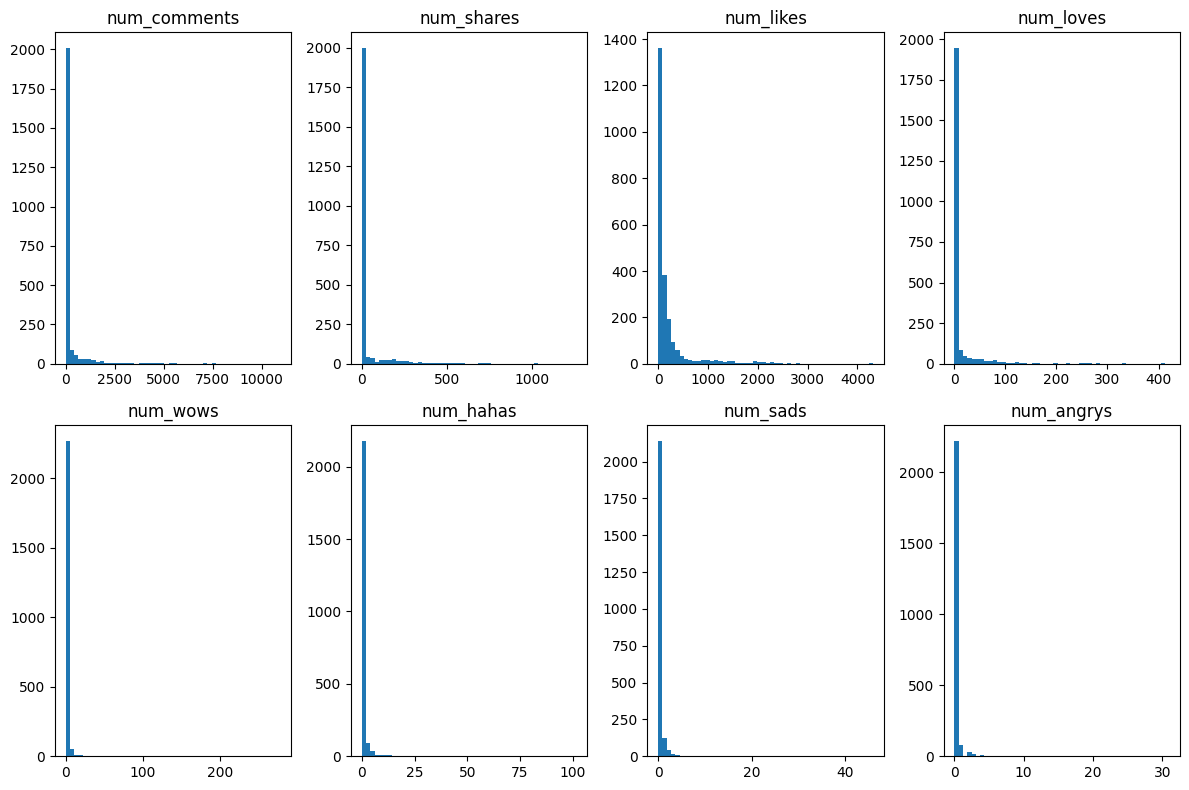

In [8]:
# Visualization: Histogram of engagement metrics
plt.figure(figsize=(12, 8))
for i, metric in enumerate(engagement_metrics):
    plt.subplot(2, 4, i+1)
    plt.hist(df[metric], bins=50)
    plt.title(metric)
    plt.tight_layout()
plt.show()

As shown above, Zero `0` remains the most common amongst the engagement metrics, which implies relatively lower or no engagement, however, what's quite also interesting to note is that `likes`, `loves`, and `comments` have more representation compared to other reactions/engagement metrics.
What could be interesting to also investigate are the trends of these metrics over time:

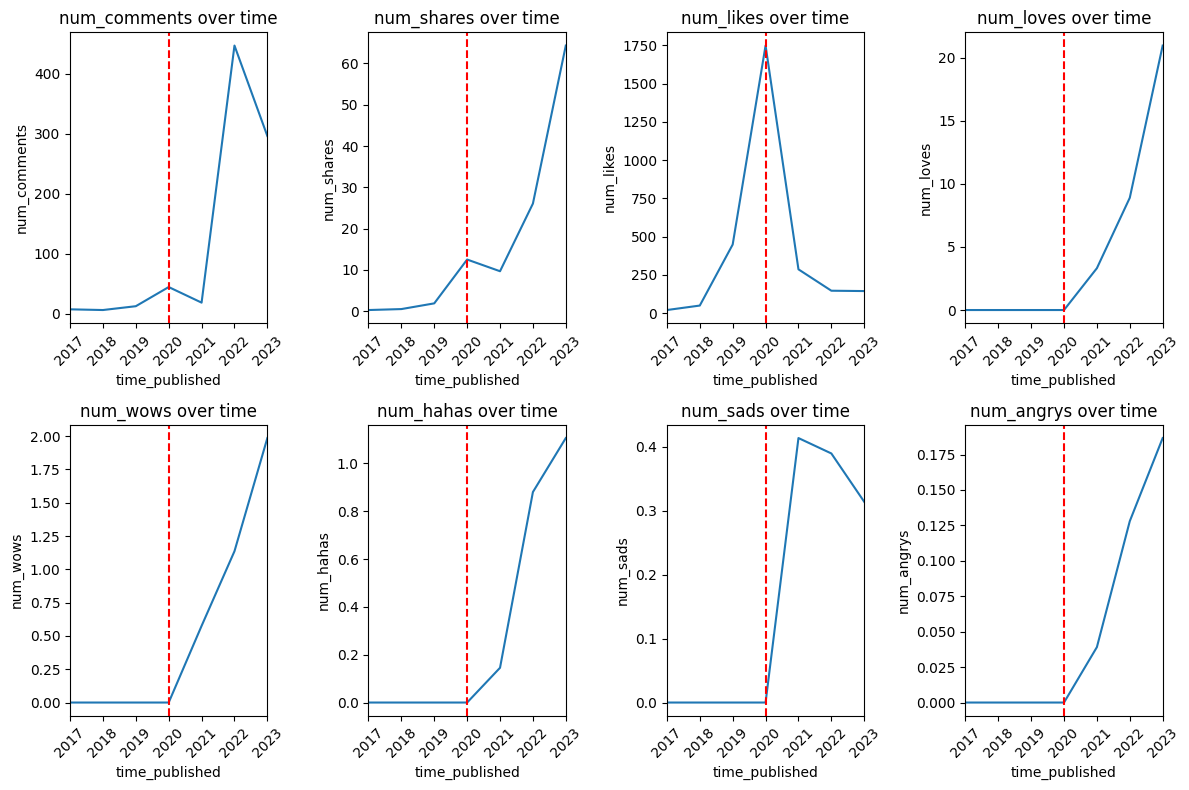

In [9]:
# Visualize engagement metrics over time
plt.figure(figsize=(12, 8))
for i, metric in enumerate(engagement_metrics):
    plt.subplot(2, 4, i+1)
    df.set_index('time_published')[metric].resample('Y').mean().plot()
    # Add a vertical red line at year 2020
    plt.axvline(pd.to_datetime('2020-01-01'), color='red', linestyle='--')
    plt.title(f'{metric} over time')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


As illustrated, there seems to have been a major shift in 2020, as for most of the engagement records, there was a spike from zero, which incidentally is also reflected in the increase in the number of shares, and decrease in the number of traditional likes, although those features were launched in 2016. What's interesting however, is the noticed increase in the number of comments since these new reaction types came onboard.
Let's observe the dynamics by `post_type`:

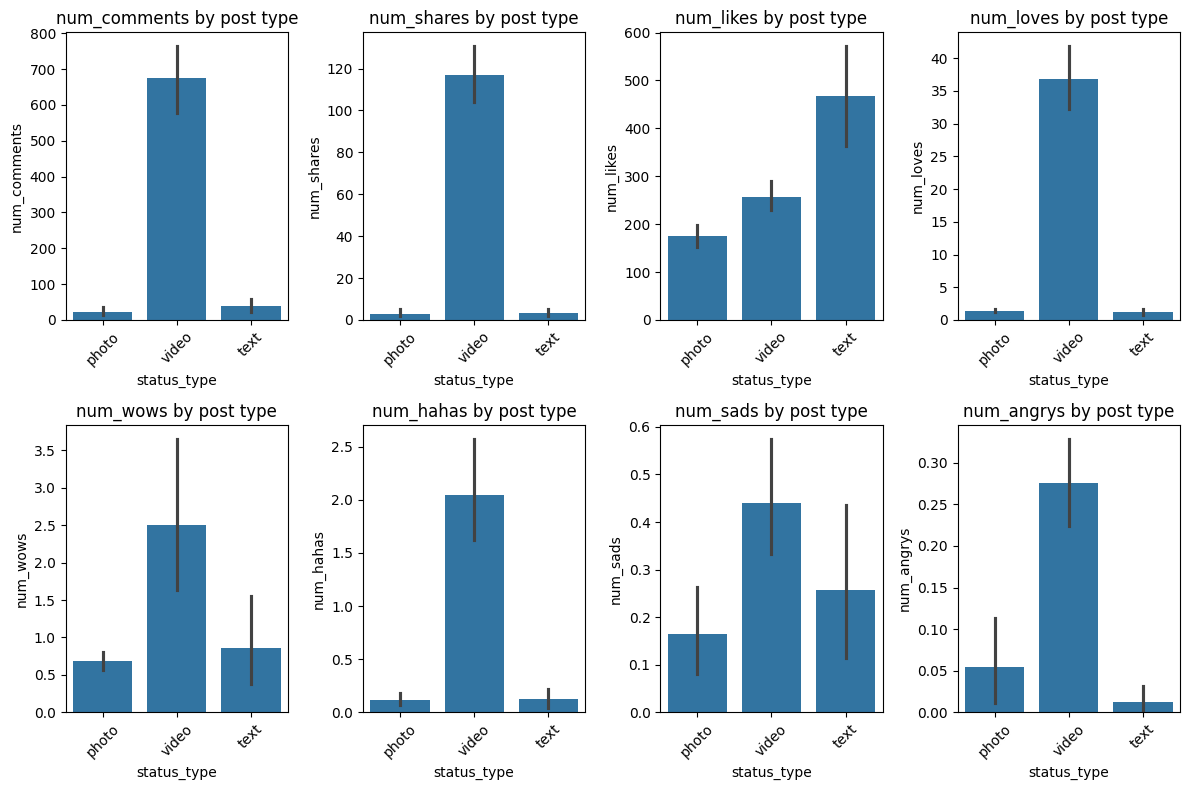

In [10]:
# Visualize engagement metrics by post type
plt.figure(figsize=(12, 8))
for i, metric in enumerate(engagement_metrics):
    plt.subplot(2, 4, i+1)
    sns.barplot(x='status_type', y=metric, data=df)
    plt.title(f'{metric} by post type')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

As earlier deduced, videos have the lead in all engagement metrics bar(pun intended) number of likes.
Now let's put the existing belief about photos to test using the defined engagement metrics.

#### **Engagement Performance of Photos**
This section compares the engagement performance of photos with other post types (videos, text, etc.). It breaks down the performance for each specific engagement metric (comments, shares, likes, etc.).

In [11]:
photo_engagement = df[df['status_type'] == 'photo'][engagement_metrics].mean()
other_engagement = df[df['status_type'] != 'photo'][engagement_metrics].mean()

print("\nIn terms of total engagement across all metrics, photos perform as follows compared to other post types:")
print(photo_engagement / (photo_engagement + other_engagement))


In terms of total engagement across all metrics, photos perform as follows compared to other post types:
num_comments    0.037463
num_shares      0.030202
num_likes       0.374622
num_loves       0.043271
num_wows        0.234293
num_hahas       0.063423
num_sads        0.288164
num_angrys      0.189837
dtype: float64



The above in addition to the previous visualization indicate that photos are liked (`num_likes`) more than text posts but less than videos, indicating a moderate level of engagement.
Also, they receive more 'love' reactions (`num_loves`) than the other types, showing a particular affinity for this type of content. They (photos) however, are not the most commented on (`num_comments`) or shared (`num_shares`), with videos taking the lead, suggesting that videos might spark more conversation and be considered worth sharing by users.
Other reactions that express amazement (`num_wows`), laughter (`num_hahas`), sadness (`num_sads`), and anger (`num_angrys`) occur less frequently for photos, especially compared to videos which seem to elicit a broader range of emotional responses.

Thus, while photos are well-received for 'likes' and 'loves', they might not inspire as broad an array of reactions as videos do.

### **Principal Component Analysis**
This section performs Principal Component Analysis (PCA) to reduce the dimensionality of the engagement metrics.

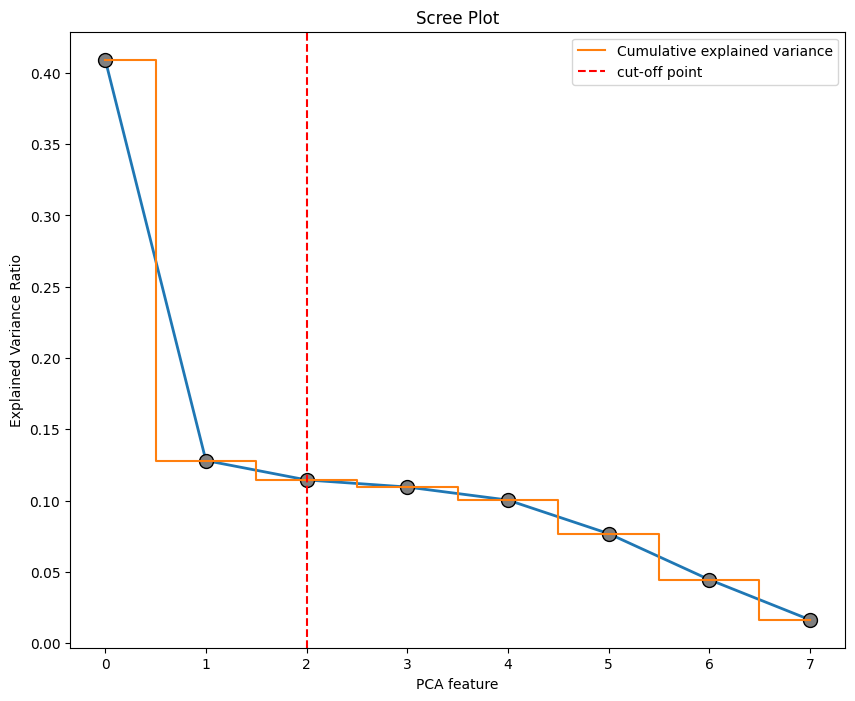

In [12]:
# Extract the engagement metrics from the dataframe
X = df[engagement_metrics]

# Scale the data using the unsupervised scaler
X_scaled = unsupervised_scaler(X)

# Initialize the PCA model
pca = PCA(n_components=None, random_state=42)

# Fit the PCA model to the scaled data
pca.fit(X_scaled)

# Plot the scree plot to visualize the explained variance
scree_plot(pca, cut_off=3)

From the plot, we can infer:

The first principal component explains substantially more variance than the subsequent components. However, PC2 and PC3 also seem acceptable, but there is a marked elbow after the first 3 principal components, suggesting that most of the data's variance can be captured with just the 3 components. The explained variance sharply decreases after that and continues to taper off as more components are added.

The retained principal components are examinined by the factor loadings (correlations with the original engagement metrics):

In [13]:
# Retain the first three principal components based on the scree plot analysis above
pc = 3

# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = pc,
            random_state = 42)

# FITTING and TRANSFORMING the scaled data
fb_pca = pca_3.fit_transform(X_scaled)

# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(X_scaled.columns)


# checking results
print("3 Components Factor Loadings")
print(factor_loadings_3)


# Interpret principal components
for i in range(pc):
    print(f"\nInterpreting Principal Component {i+1}:")
    sorted_loadings = factor_loadings_3[i].sort_values(ascending=False)
    print("Positive loadings:")
    print(sorted_loadings[sorted_loadings > 0])
    print("\nNegative loadings:")
    print(sorted_loadings[sorted_loadings < 0])

3 Components Factor Loadings
                 0     1     2
num_comments  0.41 -0.31 -0.03
num_shares    0.49 -0.12  0.05
num_likes     0.16  0.73 -0.35
num_loves     0.50  0.00  0.06
num_wows      0.30  0.48  0.08
num_hahas     0.37  0.01 -0.05
num_sads      0.20 -0.35 -0.68
num_angrys    0.22 -0.04  0.63

Interpreting Principal Component 1:
Positive loadings:
num_loves       0.50
num_shares      0.49
num_comments    0.41
num_hahas       0.37
num_wows        0.30
num_angrys      0.22
num_sads        0.20
num_likes       0.16
Name: 0, dtype: float64

Negative loadings:
Series([], Name: 0, dtype: float64)

Interpreting Principal Component 2:
Positive loadings:
num_likes    0.73
num_wows     0.48
num_hahas    0.01
Name: 1, dtype: float64

Negative loadings:
num_angrys     -0.04
num_shares     -0.12
num_comments   -0.31
num_sads       -0.35
Name: 1, dtype: float64

Interpreting Principal Component 3:
Positive loadings:
num_angrys    0.63
num_wows      0.08
num_loves     0.06
num_shares   

#### **Principal Component Analysis Interpretations**

#### **General Engagement (Component 1)**
- **Positive loadings:** `num_loves`, `num_shares`, `num_comments`, `num_hahas`, `num_wows`, `num_angrys`, `num_sads`, `num_likes`
- **Negative loadings:** None

This component represents the overall engagement level of a post, capturing the general popularity and interaction it receives from users across various metrics like shares, comments, and different types of reactions

#### **Positive Sentiment (Component 2)**
- **Positive loadings:** `num_likes`, `num_wows`
- **Negative loadings:** `num_sads`, `num_shares`, `num_comments`, `num_angrys`

This component contrasts positive reactions like likes and wows with negative reactions like sads and angry, as well as lower engagement metrics like shares and comments. It's likely the positivity of users reactions towards a post.


#### **Negative Sentiment (Component 3)**
- **Positive loadings:** `num_angrys`, `num_wows`, `num_loves`, `num_shares`
- **Negative loadings:** `num_likes`, `num_sads`, `num_hahas`, `num_comments`

This component represents the presence of negative and expressive reactions like angrys, contrasted with a lack of positive reactions like likes and hahas, as well as lower engagement metrics like comments. It captures posts that elicit strong negative sentiment or reactions from users.

### **Clustering:**
This part will be for clustering using the K-Means algorithm on the principal component scores. We'll use the elbow method to determine the optimal number of clusters.

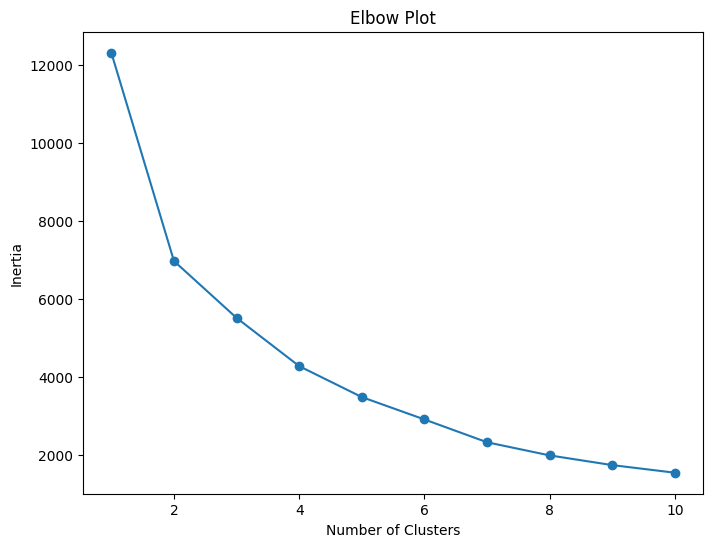

In [14]:
# Setting up the Kmeans Algo and elbow plot
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fb_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

From the plot, we can see a steep decrease in inertia as the number of clusters is increased rom 1 to 2 and then to 3. As we add more clusters, the rate of decrease in inertia becomes more gradual. The "elbow" of the plot, where the rate of decrease sharply changes, is typically used as an indicator of the optimal number of clusters. In this plot, the elbow appears to be around the third or fourth cluster, where the inertia stops decreasing as rapidly, therefore, the optimal number of clusters seem to be 4.

In [15]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(fb_pca)
df['cluster'] = clusters

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(pc)])
print("\nCluster centroids:")
print(centroids.round(2))

print("\nRenaming clusters based on interpretations:")
cluster_names = {
    0: 'Low Engagement',
    1: 'High General Engagement',
    2: 'Moderate Engagement with Positive Sentiment',
    3: 'Engagement with Controversial Content'
}
for cluster, name in cluster_names.items():
    print(f"Cluster {cluster}: {name}")

for i in range(n_clusters):
    print(f'\nInterpreting Cluster "{cluster_names[i]}":')
    cluster_data = df[df['cluster'] == i]
    print(f"Size: {len(cluster_data)}")
    print("Example post:")
    example = cluster_data.sample(1)
    print(example[['status_type', 'time_published'] + engagement_metrics])


Cluster centroids:
     PC1   PC2   PC3
0  -0.51 -0.10  0.06
1  10.41  0.40  0.70
2   0.17  2.65 -1.15
3   2.81 -0.91  0.01

Renaming clusters based on interpretations:
Cluster 0: Low Engagement
Cluster 1: High General Engagement
Cluster 2: Moderate Engagement with Positive Sentiment
Cluster 3: Engagement with Controversial Content

Interpreting Cluster "Low Engagement":
Size: 1982
Example post:
          status_type      time_published  num_comments  num_shares  \
status_id                                                             
266             photo 2021-06-14 07:34:00            15           0   

           num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
status_id                                                                   
266              108          2         1          0         0           0  

Interpreting Cluster "High General Engagement":
Size: 42
Example post:
          status_type      time_published  num_comments  num_shares  \
status_id   

#### **Cluster Interpretations and Naming**

### Cluster 0: Low Engagement
- **Centroid Values**: Negative for PC1; low for PC2 and PC3.
- **Observations**: The centroid for this cluster has negative values for PC1 and relatively low values for PC2 and PC3, which likely correlates with lower engagement overall.

### Cluster 1: High General Engagement
- **Centroid Values**: Very high positive values for all PCs.
- **Observations**: This cluster has very high positive values for all principal components, suggesting it represents posts with high engagement across the board.

### Cluster 2: Moderate Engagement with Positive Sentiment
- **Centroid Values**: Positive for PC2; negative for PC3.
- **Observations**: The positive centroid value on PC2 and the negative value on PC3 suggest this cluster might encompass posts that receive a moderate level of positive engagement.

### Cluster 3: Engagement with Controversial Content
- **Centroid Values**: Positive for PC1 and PC3.
- **Observations**: The positive values for PC1 and PC3 in this cluster's centroid suggest that posts here may get a moderate amount of engagement and potentially more negative sentiments. However, the examples do not suggest the sentiments are strictly negative.

<br></br>

#### **Proportion Analysis by Status Types**
Examining which types of posts are most popular in each group tells us what kind of content works best for them. This can help in creating the right kind of posts for each audience.

In [16]:
# Analyze status types of each segment
df['cluster_name'] = df['cluster'].map(lambda x: cluster_names[x])
df.groupby(['cluster_name', 'status_type']).size().unstack(fill_value=0)

status_type,photo,text,video
cluster_name,,,
Engagement with Controversial Content,12,0,187
High General Engagement,1,0,41
Low Engagement,1353,122,507
Moderate Engagement with Positive Sentiment,77,34,28


The **`High General Engagement`** cluster has a strong preference for video content, with 41 videos and 1 photo while, the **`Low Engagement`** cluster is dominated by photo posts (1353), followed by a significant number of videos (507) and a smaller number of text posts (122). The **`Engagement with Controversial Content`** cluster shows a leaning towards video content (187) with very few photo posts (12), and no text posts. Lastly, the **`Moderate Engagement with Sentiment Diversity`** cluster appears to have a more balanced distribution across all types of posts, with photos being the most common (77), followed by text (34), and videos (28).

Thus, re-emphasizing that, while photos are often liked and loved, they don't inspire as wide a range of interactions as videos do. They tend to receive fewer comments and shares, suggesting that while they are appreciated, they may not spark as much conversation or be deemed as share-worthy. Photos also have fewer reactions that suggest amazement, humor, or strong emotional responses compared to videos. This could suggest that photos are seen as more passively consumable content, while videos might be driving deeper engagement.

### **Model Training and Evaluation**
Next, we develop three logistic regression models to predict whether a post is a photo or not, based on different sets of features:

- Original engagement metrics
- Principal component scores
- Cluster assignments

The models will be trained and evaluated using accuracy and AUC (Area Under the ROC Curve) scores reported. The best model will be selected based on the AUC score.

In [17]:
# Set features and target
X = df[engagement_metrics]
y = (df['status_type'] == 'photo').astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df['status_type'], random_state=42)

# Model 1: Original features
model1 = LogisticRegression(random_state=42)
model1.fit(X_train, y_train)

# Model 2: Principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model2 = LogisticRegression(random_state=42)
model2.fit(X_train_pca, y_train)

# Model 3: Clusters
X_train_clusters = pd.get_dummies(df.loc[X_train.index, 'cluster'], drop_first=True)
X_test_clusters = pd.get_dummies(df.loc[X_test.index, 'cluster'], drop_first=True)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train_clusters, y_train)

# Select the best model
models = [model1, model2, model3]
X_test_features = [X_test, X_test_pca, X_test_clusters]
model_names = ['Original Features', 'Principal Components', 'Clusters']
best_model_idx = None
best_model_score = -1
for i, model in enumerate(models):
    y_pred = model.predict(X_test_features[i])
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_proba = model.predict_proba(X_test_features[i])[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nModel: {model_names[i]}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"AUC: {auc:.4f}")
    if auc > best_model_score:
        best_model_idx = i
        best_model_score = auc

print(f"\nBest model: {model_names[best_model_idx]}")
best_model = models[best_model_idx]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = best_model.predict(X_test)

print("\nConfusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nExplaining errors and associated risks:")
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives ({tn}): Correctly predicted non-photo posts.")
print(f"False Positives ({fp}): Non-photo posts misclassified as photos. Risk of targeting wrong audience or diluting photo content strategy.")
print(f"False Negatives ({fn}): Photo posts misclassified as non-photos. Risk of missing opportunities to leverage effective photo content.")
print(f"True Positives ({tp}): Correctly predicted photo posts.")


Model: Original Features
Accuracy: 0.75
AUC: 0.7131

Model: Principal Components
Accuracy: 0.75
AUC: 0.7124

Model: Clusters
Accuracy: 0.71
AUC: 0.6490

Best model: Original Features

Confusion matrix:
[[ 74 101]
 [ 10 288]]

Explaining errors and associated risks:
True Negatives (74): Correctly predicted non-photo posts.
False Positives (101): Non-photo posts misclassified as photos. Risk of targeting wrong audience or diluting photo content strategy.
False Negatives (10): Photo posts misclassified as non-photos. Risk of missing opportunities to leverage effective photo content.
True Positives (288): Correctly predicted photo posts.


#### **Model Evaluation**

##### Original Features
- Accuracy: 0.75 (75% of the predictions were correct)
- AUC (Area Under the ROC Curve): 0.71 (The model has a fair ability to distinguish between photo and non-photo posts)

##### Principal Components
- Accuracy: 0.75 (same as the original features model)
- AUC: 0.71 (same as the original features model)

##### Clusters
- Accuracy: 0.71 (71% of the predictions were correct)
- AUC: 0.65 (The model has a lower ability to distinguish between photo and non-photo posts compared to the other models)

#### **Confusion Matrix**
- True Negatives (74): The model correctly identified 74 non-photo posts.
- False Positives (101): The model misclassified 101 non-photo posts as photos. This could lead to targeting the wrong audience or diluting the photo content strategy.
- False Negatives (10): The model misclassified 10 photo posts as non-photos. This could result in missing opportunities to leverage effective photo content.
- True Positives (288): The model correctly identified 288 photo posts.

### **Interpretation**
- The models trained on the original features and principal components had slightly identical performance, with an accuracy of 0.75 and an AUC of approxmately 0.71.
- The clusters model had a lower accuracy of 0.71 and a lower AUC of 0.65 compared to the other two models.
- The relatively high number of false positives (101) compared to false negatives (10) suggests that the model has a tendency to overpredict photo posts, which could lead to targeting the wrong audience.
- The true positives (288) and true negatives (74) indicate that the model correctly classified a significant number of instances from both classes.

### **Conclusion**

The analysis conducted in this project aimed to investigate the impact of photo content on customer engagement metrics for Facebook in Thailand. Through a series of techniques, including Principal Component Analysis (PCA), clustering, and logistic regression modeling, several insights were derived.

The key findings are as follows:

1. **Photo Content Performance**: While photos were well-received by users, with a high number of likes and love reactions, they did not inspire as broad an array of reactions or engagement as videos. Photos tended to receive fewer comments and shares, suggesting that while appreciated, they might not spark as much conversation or be deemed as share-worthy as video content.

2. **Principal Component Analysis**: PCA revealed three main components: General Engagement, Positive Sentiment, and Negative Sentiment. These components provided a condensed representation of the engagement metrics, enabling further analysis and modeling.

3. **Clustering**: Four distinct clusters were identified based on the PCA components: Low Engagement, High General Engagement, Moderate Engagement with Positive Sentiment, and Engagement with Controversial Content. The High General Engagement cluster showed a strong preference for video content, while the Low Engagement cluster was dominated by photo posts.

4. **Logistic Regression Models**: Three logistic regression models were trained to predict whether a post was a photo or not, using different feature sets: original engagement metrics, principal components, and cluster assignments. The models trained on the original features and principal components performed similarly, with an accuracy of 0.75 and an AUC of 0.71. The clusters model had a lower performance, with an accuracy of 0.71 and an AUC of 0.65.

5. **Model Evaluation**: The confusion matrix revealed that the models had a tendency to overpredict photo posts, which could lead to targeting the wrong audience or diluting the photo content strategy. However, the models correctly classified a significant number of instances from both photo and non-photo classes.

In summary, while photos are widely appreciated by users, the analysis suggests that they may not be as effective in driving broad engagement and conversation as video content. To maximize engagement and leverage effective content strategies, a balanced approach combining both photo and video content could be beneficial. Additionally, the insights gained from clustering and sentiment analysis can inform targeted content creation and audience segmentation strategies.

Further analysis and validation on a separate test set may be required to refine the models and derive more robust recommendations. Nonetheless, this project provides valuable insights into the dynamics of photo content engagement and can serve as a foundation for optimizing social media marketing strategies for the client.